In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append('../py')
from knn_classifier import KnnClassifier
from exp import *

# Include path to binaries on PATH variable
bin_path = os.path.join(os.path.dirname('../'))
os.environ['PATH'] = "{}:{}".format(bin_path, os.environ['PATH'])

In [2]:
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit

In [3]:
with open('../data/train.csv') as f:
    lines = np.loadtxt(f, delimiter=',', dtype=np.uint8, skiprows=1)
    X = lines[:,1:]
    y = lines[:,0]
    lines = None

In [4]:
sss = StratifiedShuffleSplit(n_splits=1, train_size=10000, random_state=0)

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1630: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
for train_index, _ in sss.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    break

In [6]:
k_test = [1,2,3,4,5,6,7,8,9,10]
alpha_test = [10,20,30,40,50,60,70,80,90,100]
all_res = []

In [9]:
for alpha in alpha_test:
    asd = "res_alpha_{} = run_crossval_incrementing_k(X_train, y_train, k_test, alpha=alpha, cv_k=5)".format(alpha)
    exec(asd)
    

1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


In [19]:
f1_scores = []
acc_scores = []
time_ = []
for alpha in alpha_test:
    f1 = "f1_scores.append(res_alpha_{}['f1'])".format(alpha)
    acc = "acc_scores.append(res_alpha_{}['acc'])".format(alpha)
    t = "time_.append(res_alpha_{}['times'])".format(alpha)
    
    exec(f1)
    exec(acc)
    exec(t)


10
[[0.8862582972028803, 0.8862582972028803, 0.90207806513672717, 0.90424356630222835, 0.9025783142635363, 0.90174514767974578, 0.90191306297297302, 0.90341331259853475, 0.90491189821993612, 0.90441173147039355], [0.94138085529049087, 0.94138085529049087, 0.94904177957173463, 0.94970802986329694, 0.94904202869854393, 0.94854294457414789, 0.94704377682560414, 0.94721060999243722, 0.94487919053820202, 0.94437935703836862], [0.95304003194342679, 0.95304003194342679, 0.95986787276627517, 0.95936745664054701, 0.95686995314553969, 0.95603720268747727, 0.95337086902114365, 0.95353720243810114, 0.95070586660801337, 0.95037278290024174], [0.95620445123191011, 0.95620445123191011, 0.95986737276702316, 0.959201621477208, 0.95553803468955734, 0.95570495098178576, 0.95303936619213703, 0.95220586635863713, 0.95137278265086545, 0.9493737814024884], [0.95587236602638503, 0.95570569935971827, 0.95836895389516463, 0.95886887052039327, 0.95636945339566415, 0.95620328622949691, 0.95287253277592765, 0.9507

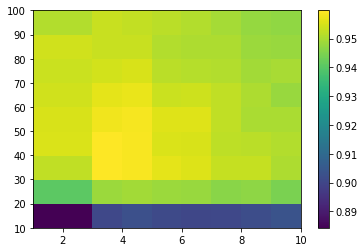

In [20]:
fig, ax = plt.subplots()
im = ax.pcolormesh(k_test, alpha_test, f1_scores)
fig.colorbar(im)

plt.show()

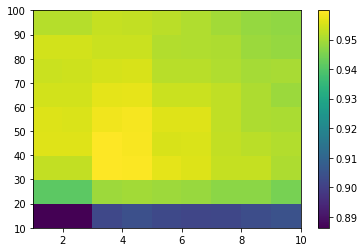

In [22]:
fig, ax = plt.subplots()
im = ax.pcolormesh(k_test, alpha_test, acc_scores)
fig.colorbar(im)

plt.show()

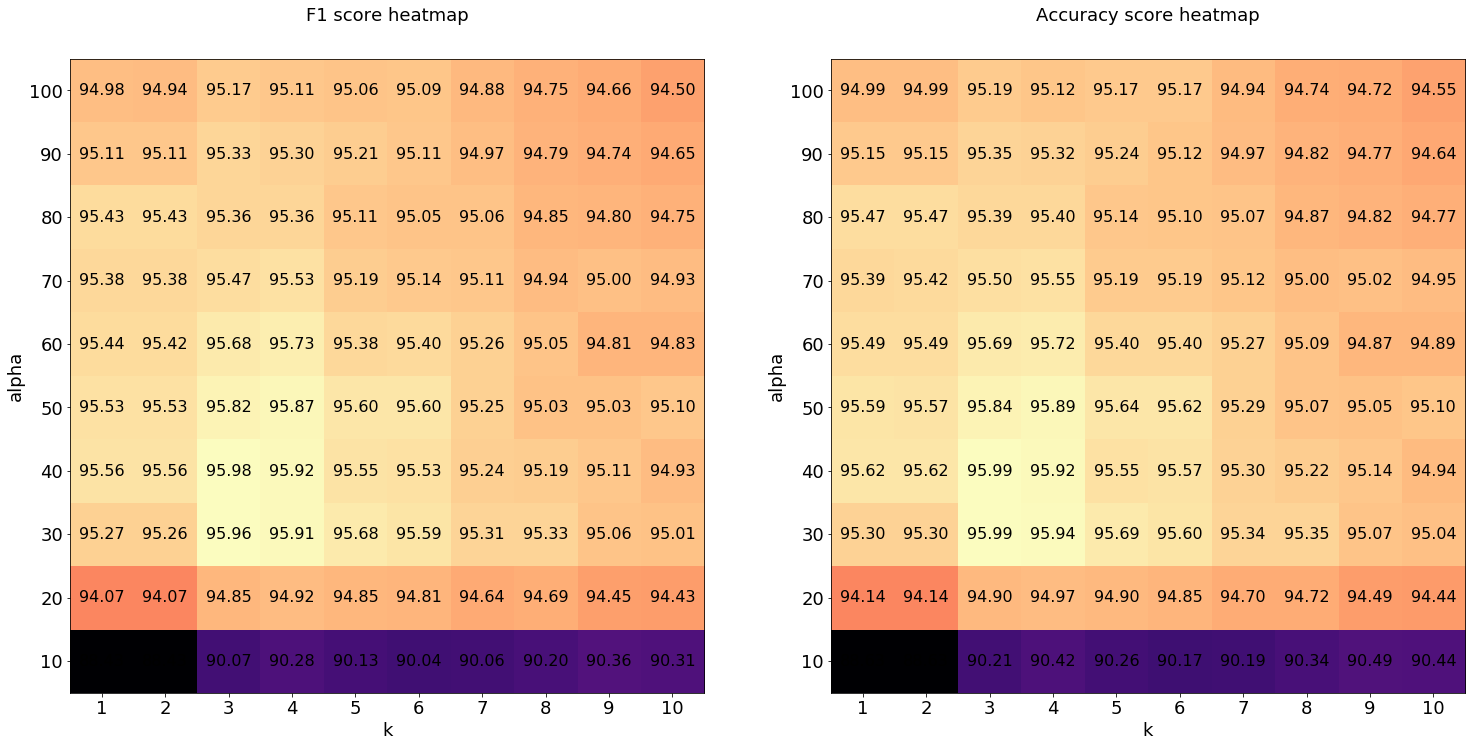

In [98]:
from matplotlib import ticker
fig, ax = plt.subplots(1,2, figsize=(25, 15))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.

f1_fig = ax[0].matshow(f1_scores, cmap='magma', origin='lower')
acc_fig = ax[1].matshow(acc_scores, cmap='magma', origin='lower')
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].xaxis.set_ticks_position('bottom')
ax[0].set_xticklabels(['']+k_test, fontsize= 18)  
ax[0].set_yticklabels(['']+alpha_test, fontsize= 18)
#fig.colorbar(f1_fig)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].xaxis.set_ticks_position('bottom')
ax[1].set_xticklabels(['']+k_test, fontsize= 18)  
ax[1].set_yticklabels(['']+alpha_test,fontsize= 18)
ax[0].set_title('F1 score heatmap', fontsize=18)
ax[1].set_title('Accuracy score heatmap', fontsize= 18)
ax[0].set_xlabel('k', fontsize=18)
ax[1].set_xlabel('k', fontsize=18)
ax[0].set_ylabel('alpha', fontsize=18)
ax[1].set_ylabel('alpha', fontsize=18)

for (i, j), z in np.ndenumerate(f1_scores):
    ax[0].text(j, i, '{:0.2f}'.format(z*100), ha='center', va='center', fontsize=16)

for (i, j), z in np.ndenumerate(acc_scores):
    ax[1].text(j, i, '{:0.2f}'.format(z*100), ha='center', va='center', fontsize=16)    
plt.show()

In [63]:
np.save('exp1_f1_scores', f1_scores)
np.save('exp1_acc_scores', acc_scores)
np.save('exp1_times_', time_)

In [141]:
time_k = []
for i in range(len(time_[0])):
    temp = []
    for lst in time_:
        temp.append(lst[i])
    time_k.append(temp)

10


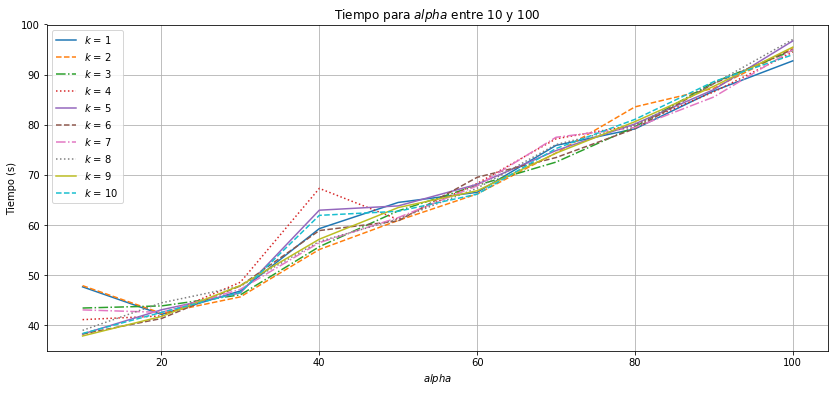

In [151]:
f, ax_time = plt.subplots()
f.set_figwidth(14)
f.set_figheight(6)

def ax_args_for(t, metric, alphas):
    from itertools import chain, cycle
    lines = ["-", "--", "-.", ":"]
    linecycler = cycle(lines)
    return chain(*[[t, time_k[a-1], next(linecycler)] for a in k_test])

x = list(range(1, 11))

ax_time.set_title('Tiempo para $alpha$ entre ${}$ y ${}$'.format(alpha_test[0], alpha_test[-1]))
ax_time.set_ylabel('Tiempo (s)')
ax_time.set_xlabel('$alpha$')
ax_time.plot(*ax_args_for(alpha_test, 'times', time_))
ax_time.grid(linestyle='-')
ax_time.legend(['$k$ = {}'.format(a) for a in k_test]);

In [143]:
res_alpha_50_new = run_crossval_incrementing_k(X_train, y_train, k_test, alpha=50, cv_k=5)

1
2
3
4
5
6
7
8
9
10


In [150]:
print(res_alpha_50_new['times'])

for i, elem in enumerate(time_k):
    time_k[i][4] = res_alpha_50_new['times'][i]

[64.49019455909729, 60.89705467224121, 62.80803060531616, 61.089561462402344, 63.799171924591064, 60.803466796875, 61.4655339717865, 61.19270920753479, 63.47019410133362, 62.723249673843384]


In [153]:
k_test_2 = [3,4]
alpha_test_2 = list(range(30,52, 2))
all_res = []
for alpha in alpha_test_2:
    asd = "res_alpha_{}_2 = run_crossval_incrementing_k(X_train, y_train, k_test_2, alpha=alpha, cv_k=5)".format(alpha)
    exec(asd)

3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4


In [154]:
f1_scores_2 = []
acc_scores_2 = []
time_2_ = []
for alpha in alpha_test_2:
    f1 = "f1_scores_2.append(res_alpha_{}_2['f1'])".format(alpha)
    acc = "acc_scores_2.append(res_alpha_{}_2['acc'])".format(alpha)
    t = "time_2_.append(res_alpha_{}_2['times'])".format(alpha)
    
    exec(f1)
    exec(acc)
    exec(t)

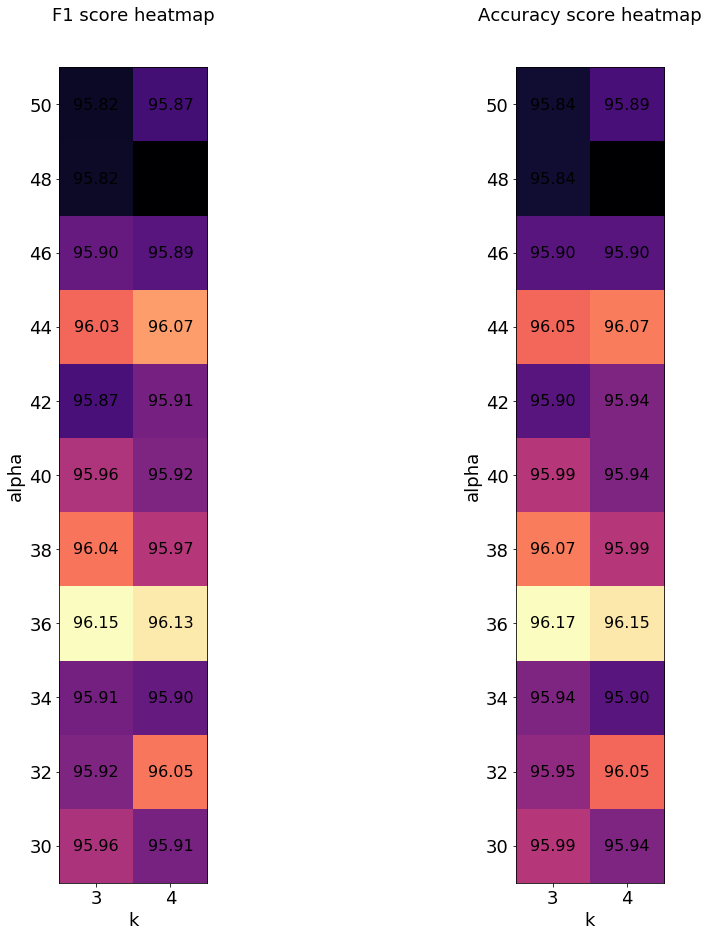

In [159]:
fig, ax = plt.subplots(1,2, figsize=(15, 15))
# Using matshow here just because it sets the ticks up nicely. imshow is faster.

f1_fig = ax[0].matshow(f1_scores_2, cmap='magma', origin='lower')
acc_fig = ax[1].matshow(acc_scores_2, cmap='magma', origin='lower')
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[0].xaxis.set_ticks_position('bottom')
ax[0].set_xticklabels(['']+k_test_2, fontsize= 18)  
ax[0].set_yticklabels(['']+alpha_test_2, fontsize= 18)
#fig.colorbar(f1_fig)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(1))
ax[1].xaxis.set_ticks_position('bottom')
ax[1].set_xticklabels(['']+k_test_2, fontsize= 18)  
ax[1].set_yticklabels(['']+alpha_test_2,fontsize= 18)
ax[0].set_title('F1 score heatmap', fontsize=18)
ax[1].set_title('Accuracy score heatmap', fontsize= 18)
ax[0].set_xlabel('k', fontsize=18)
ax[1].set_xlabel('k', fontsize=18)
ax[0].set_ylabel('alpha', fontsize=18)
ax[1].set_ylabel('alpha', fontsize=18)

for (i, j), z in np.ndenumerate(f1_scores_2):
    ax[0].text(j, i, '{:0.2f}'.format(z*100), ha='center', va='center', fontsize=16)

for (i, j), z in np.ndenumerate(acc_scores_2):
    ax[1].text(j, i, '{:0.2f}'.format(z*100), ha='center', va='center', fontsize=16)    
plt.show()

In [77]:
for i in range(1,len(k_test)+1):
    a = "res_k_{}_av = []".format(i)
    exec(a)
everything = [res_k_1, res_k_2, res_k_3, res_k_4, res_k_5, res_k_6, res_k_7]

import numpy
for i,asd in enumerate(everything):
    for elem in asd:
        b = "res_k_{}_av.append(numpy.average(elem))".format(i+1)
        exec(b)

In [82]:
everything_av = [res_k_1_av, res_k_2_av, res_k_3_av, res_k_4_av, res_k_5_av, res_k_6_av, res_k_7_av]

7


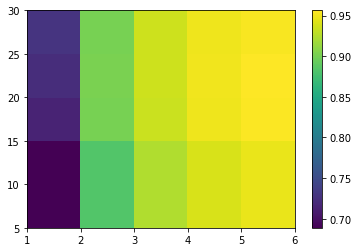

In [90]:
fig, ax = plt.subplots()
k_test = [1,2,3,4,5,6]
everything_av = [res_k_1_av, res_k_2_av, res_k_3_av, res_k_4_av, res_k_5_av, res_k_6_av]
im = ax.pcolormesh(k_test, alpha_test, everything_av)
fig.colorbar(im)

plt.show()

In [160]:
def train_sizes():
    rango_1000 = range(100, 1000, 100)
    rango_10000 = range(1000, 10000, 1000)
    rango_30000 = range(10000, 30000, 2000)
    rango_41990 = range(30000, 41990, 3000)
    rango = list(rango_1000) + list(rango_10000) + list(rango_30000) + list(rango_41990)
    rango.append(41990)
    return rango



In [169]:
def set_X_y_with_train_size(train_size, test_size=10, seed=0):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_size, test_size=test_size, random_state=seed)
    for train_index, _ in sss.split(X, y):
        X_train = X[train_index]
        y_train = y[train_index]
        return X_train, y_train

def save_array(fname, arr):
    full_fname = '{}.npy'.format(fname)
    np.save(fname, arr)
    
def run_knn_with_k_alpha(k, alpha, X_train, y_train, cv_k=5, seed=0, n_iters=3):
    scoring = {'acc': 'accuracy', 'f1': 'f1_macro'}
    results = {'acc': [], 'f1': [], 'times': []}
    clf = KnnClassifier(k=k, alpha=alpha)
    cv = StratifiedKFold(n_splits=cv_k, random_state=seed)
    cv = list(cv.split(X_train, y_train))[:n_iters]
    res = cross_validate(clf, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False, n_jobs=-1)
    results['acc'].append(np.mean(res['test_acc']))
    results['f1'].append(np.mean(res['test_f1']))
    results['times'].append(np.mean(res['score_time']))
    return results
    
def run_knn_with_k_alpha_incrementing_train_size(k, alpha, cv=5):
    sizes = train_sizes()
    file_name = "exp3_{}"
    results = []
    for size in sizes:
        file_name.format(size)
        X_train, y_train = set_X_y_with_train_size(size)
        assert(len(X_train) > 0)
        results.append(run_knn_with_k_alpha(k, alpha, X_train, y_train, cv))
        save_array(file_name, results)

In [170]:
run_knn_with_k_alpha_incrementing_train_size(3, 37)

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmplpg19657... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 359341 305204 247064 217668 185780 162871 128982 121172 112565 100513 93261.5 82980.4 77625 65539.7 63069.4 54174.8 53426.2 48598 46069.2 44391.4 42291.3 41126 36581 33928.3 32592.8 31777.3 28848.7 28260.6 27217.1 24662.2 24056.8 23159.2 22429.1 20710.3 19988.8 19215.8 17094.1 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpxbcmbnov... listo.
Tamaño dataset: 79
Corriendo PCA... listo.
Autovalores: 324470 306170 237118 227238 211994 153589 128709 114154 106202 100427 93654.8 83914.5 77841.7 74389.3 63567.4 61911.2 56169.9 52157.2 48857.2 46065.2 40357.4 36382.1 35876.6 33292.7 30712.5 29615.2 29337.4 28349.8 25621.1 24494.2 23246 22183.2 21281.6 20381 19254.3 18305.9 16748.6 
Transformando dataset... li

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpn3ajmlm1... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 313969 309223 266535 216543 200301 188526 138059 118011 107625 101028 87943.4 81602.8 70626.5 68440.6 64687.6 56434 53105 50130.6 48652.2 43239.7 42847.8 38805 34593.3 32268.8 31880.1 29691.7 28094.7 26531.6 24762.5 24099.9 23324.6 22610.9 21062.8 19704.5 19430.4 18887.4 17295 
Transformando dataset... listo.



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp5hky9uio... listo.
Tamaño dataset: 80
Corriendo PCA... listo.
Autovalores: 359341 305204 247064 217668 185780 162871 128983 121172 112565 100513 93261.4 82980.8 77624.7 65539.9 63069.2 54172.1 53429.1 48597.8 46069.1 44391.5 42291.2 41126.1 36581 33928.1 32593.1 31777.1 28848.5 28260.6 27217.3 24662.1 24056.9 23159.2 22429.1 20710.2 19988.8 19215.9 17094.1 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpax3hvgdy... listo.
Tamaño dataset: 79
Corriendo PCA... listo.
Autovalores: 324470 306171 237118 227238 211994 153589 128709 114154 106202 100427 93654.7 83914.4 77841.5 74389.6 63566.5 61912.1 56170 52157.1 48857.4 46065.1 40357.4 36381.6 35877 33292.7 30712.6 29614.7 29337.9 28349.8 25620.9 24494.3 23246 22183.2 21281.5 20381.1 19254.3 18305.9 16748.5 
Transformando dataset..


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpa34bjola... listo.
Tamaño dataset: 317
Corriendo PCA... listo.
Autovalores: 356749 243725 232272 189843 182322 163748 118876 101219 95616.4 86378.7 79890.5 75921.2 68187.8 60929.2 57286.7 50087.8 48961.4 46914.4 42281.6 40715.5 38177.5 37328 36202.1 33274.6 31864.1 28816.7 28521.3 25944.6 25410.3 24698.9 24397 22564.7 21444 20439.4 19817.9 19029.6 18414.7 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp3s42wj_i... listo.
Tamaño dataset: 320
Corriendo PCA... listo.
Autovalores: 338281 254944 233485 181349 178795 159290 117683 104265 91982.1 86432.5 79785.3 72067.1 67908.5 64032.1 59573.9 52338 51363.7 47224.5 41514 38418.1 36698.9 36316.2 34517.8 32364.5 31977.7 28471.4 26842 25705.2 25209.7 24282.5 23112.4 22047.8 21493.8 20678.7 19468.7 19010.4 18429.9 
Transformando datase


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp2ml1j2it... listo.
Tamaño dataset: 557
Corriendo PCA... listo.
Autovalores: 343508 250844 233520 182234 170570 157985 117688 103823 94799.6 90189.8 78743.9 70495.6 65434.5 57862.6 57343.5 50999.7 47655.5 45116.7 39971.8 39252 38368.4 34292.5 31968.1 31676.3 31399.2 28714.3 27244.5 26479.9 24930.8 23712.9 23366.4 21718.3 20180.7 19669.8 19177 18727.7 17853.9 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmpzrmv66qf... listo.
Tamaño dataset: 558
Corriendo PCA... listo.
Autovalores: 330729 244416 235834 179317 175880 147930 120546 105021 95032.4 89820.4 78631.2 72004.4 67289.1 62407.7 58956.4 53666 46549.1 45273.5 41549.6 38775.4 37141 36237.4 35706.1 33732.6 31022.1 28796.5 27953.9 26763.2 25197.4 24382 22622.3 21824.9 21026.1 19913.6 19522.3 19076 18145.1 
Transformando datase


stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmprl6qx0ja... listo.
Tamaño dataset: 800
Corriendo PCA... listo.
Autovalores: 333509 244776 230016 183100 169309 150094 115920 101414 93658 87750.8 73731.6 67101 62713.8 59200.4 57998.9 50622 47119.5 42704.3 41080.4 37781.2 37520.3 35285.8 33941 32508.4 30518.8 28405.1 27417 26584.2 25731.3 23780.9 23093.4 21812.5 20372.6 19731.2 19139.3 18656.5 18373.3 
Transformando dataset... listo.

stderr: Parámetro PCA = 1
Parámetro K = 3
Parámetro ALPHA = 37
Parámetro N_ITER = 1000
Leyendo dataset de /tmp/tmp5x2elspu... listo.
Tamaño dataset: 797
Corriendo PCA... listo.
Autovalores: 341226 244396 229473 182847 174375 148935 112912 100627 94387.1 89161.5 72585 67025.2 65128.4 60151.3 57856.2 51399.4 45104.7 44406.2 40363.2 38412.5 35951.3 35680.5 33264.2 31672.4 30227.1 29279.1 28291.4 27610.7 25255 24351.7 22659.7 21562.1 20983.1 19561.5 19155.7 18846.5 18363.3 
Transformando dataset.

KeyboardInterrupt: 